In [1]:
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import pydot

pd.options.display.max_columns = None

In [2]:
df = pd.read_excel('2022_World_Cup_knockout_stage.xlsx')

In [3]:
df.loser_team.unique()

array(['United States', 'Australia', 'Poland', 'Senegal', 'Japan',
       'Korea Republic', 'Spain', 'Switzerland', 'Brazil', 'Netherlands',
       'Portugal', 'England', 'Croatia', 'Morocco', 'France'],
      dtype=object)

In [4]:
df['scores'] = df.winner_final_pts.astype(str) + ' - ' + df.loser_final_pts.astype(str)

In [5]:
df

,date,winner_team,loser_team,winner_final_pts,loser_final_pts,scores
0,2022-12-03,Netherlands,United States,3,1,3 - 1
1,2022-12-03,Argentina,Australia,2,1,2 - 1
2,2022-12-04,France,Poland,3,1,3 - 1
3,2022-12-04,England,Senegal,3,0,3 - 0
4,2022-12-05,Croatia,Japan,4,2,4 - 2
5,2022-12-05,Brazil,Korea Republic,4,1,4 - 1
6,2022-12-06,Morocco,Spain,3,0,3 - 0
7,2022-12-06,Portugal,Switzerland,6,1,6 - 1
8,2022-12-09,Croatia,Brazil,5,3,5 - 3
9,2022-12-09,Argentina,Netherlands,6,5,6 - 5


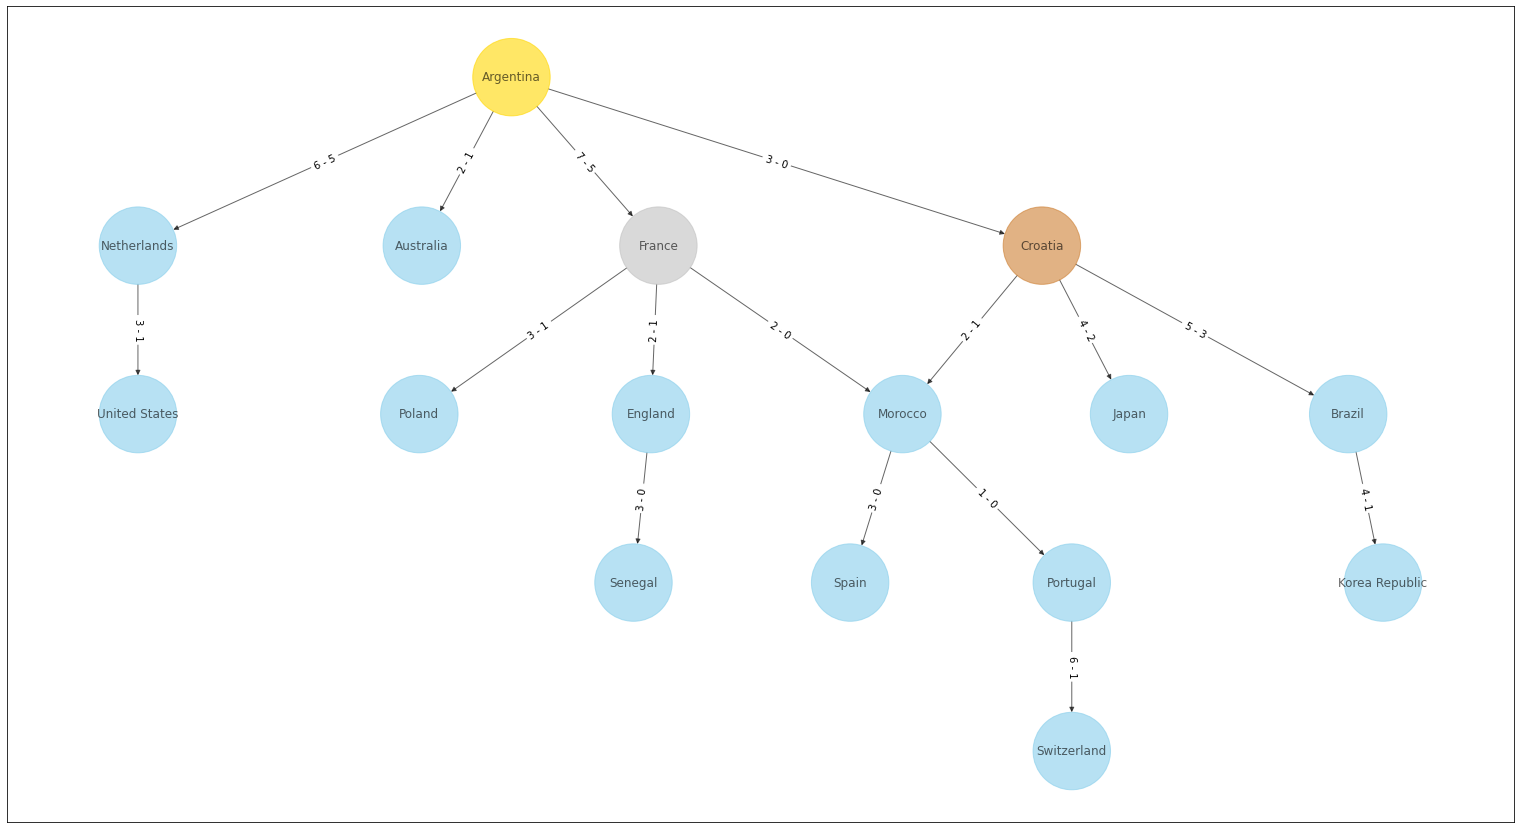

In [6]:
# coord = {0: [8, 0], 2: [9, -1], 1: [8, -2], 4: [10, -2], 3: [9, -3], 5: [11, -3]}
# eg = [[0, 2], [2, 1], [2, 4], [4, 3], [4, 5]]
eg = np.array(df[['winner_team', 'loser_team', 'scores']]).tolist()
eg = list(map(lambda x: [x[0], x[1], {'label': x[2]}], eg))

G = nx.DiGraph()
G.add_edges_from(eg) 
edge_labels = nx.get_edge_attributes(G,'label')
pos = graphviz_layout(G, prog = "dot")
plt.figure(figsize = (27,15))
color_map = []

for node in G:
#     print(node)a
    if node == 'Argentina':
        color_map.append('#FFD700')
    elif node == 'France':
        color_map.append('#C0C0C0')
    elif node == 'Croatia':
        color_map.append('#CD7F32')
    else: 
        color_map.append('skyblue')   

nx.draw_networkx(G, with_labels=True, node_size=6000, node_color = color_map, alpha = 0.6, pos = pos) 

nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [7]:
df['pts_difference'] = df.winner_final_pts - df.loser_final_pts

In [8]:
eg = np.array(df[['winner_team', 'loser_team', 'pts_difference']]).tolist()
G = nx.DiGraph()
G.add_weighted_edges_from(eg)
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())


# plt.figure(figsize = (27,15))
# nx.draw(G, pos, with_labels=True, node_size=8000, node_color=color_map, 
#         edgelist=edges, 
#         edge_color=weights, 
#         width=3, 
#         edge_cmap=plt.cm.Blues, alpha = 0.6
#        )
# nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
# plt.show()

In [9]:
lst = []
for i in list(G.nodes):
    if i == 'Argentina':
#         pass
        lst.append([i, 0])
    else:
        lst.append([i, nx.dijkstra_path_length(G, 'Argentina', i)])
#     print(i)

In [10]:
distance = pd.DataFrame(lst, columns = ['Team', "Shortest point distance to Winner"]).sort_values('Shortest point distance to Winner').reset_index(drop = True)
distance.index += 1

In [11]:
distance.style.set_table_styles([{'selector':'th',
                            'props':[('word-wrap', ' break-word'),
                                     ('max-width','50px'),
                                     ( 'text-align', 'left')
                                    ]
                           }])

,Team,Shortest point distance to Winner
1,Argentina,0
2,Netherlands,1
3,Australia,1
4,France,2
5,United States,3
6,England,3
7,Croatia,3
8,Poland,4
9,Morocco,4
10,Japan,5


In [12]:
df['weights_of_games'] = np.hstack((np.repeat(1, 8), 
                          np.repeat(2, 4),
                          np.repeat(3, 2),
                          np.array([4]),
                        np.array([5])))[::-1]

In [13]:
df['weighted_pts_difference'] = df.pts_difference * df.weights_of_games

In [14]:
df

,date,winner_team,loser_team,winner_final_pts,loser_final_pts,scores,pts_difference,weights_of_games,weighted_pts_difference
0,2022-12-03,Netherlands,United States,3,1,3 - 1,2,5,10
1,2022-12-03,Argentina,Australia,2,1,2 - 1,1,4,4
2,2022-12-04,France,Poland,3,1,3 - 1,2,3,6
3,2022-12-04,England,Senegal,3,0,3 - 0,3,3,9
4,2022-12-05,Croatia,Japan,4,2,4 - 2,2,2,4
5,2022-12-05,Brazil,Korea Republic,4,1,4 - 1,3,2,6
6,2022-12-06,Morocco,Spain,3,0,3 - 0,3,2,6
7,2022-12-06,Portugal,Switzerland,6,1,6 - 1,5,2,10
8,2022-12-09,Croatia,Brazil,5,3,5 - 3,2,1,2
9,2022-12-09,Argentina,Netherlands,6,5,6 - 5,1,1,1


In [15]:
eg = np.array(df[['winner_team', 'loser_team', 'weighted_pts_difference']]).tolist()
G = nx.DiGraph()
G.add_weighted_edges_from(eg)
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

lst = []
for i in list(G.nodes):
    if i == 'Argentina':
#         pass
        lst.append([i, 0])
    else:
        lst.append([i, nx.dijkstra_path_length(G, 'Argentina', i)])

In [16]:
weighted_distance = pd.DataFrame(lst, columns = ['Team', "Shortest weighted point distance to Winner"])\
                                .sort_values('Shortest weighted point distance to Winner').reset_index(drop = True)
weighted_distance.index += 1

In [17]:
weighted_distance.style.set_table_styles([{'selector':'th',
                            'props':[('word-wrap', ' break-word'),
                                     ('max-width','60px'),
                                     ( 'text-align', 'left')
                                    ]
                           }])

,Team,Shortest weighted point distance to Winner
1,Argentina,0
2,Netherlands,1
3,France,2
4,England,3
5,Croatia,3
6,Australia,4
7,Morocco,4
8,Brazil,5
9,Portugal,5
10,Japan,7
